In [8]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [9]:
load_dotenv()  # Load environment variables from .env file
import os

In [11]:
def get_groq_llm():
    return ChatOpenAI(
        model_name="openai/gpt-oss-20b",
        base_url="https://api.groq.com/openai/v1",
        api_key=os.getenv("GROQ_API_KEY"),
        temperature=0.7,max_tokens=2000
    )
llm = get_groq_llm()

In [12]:
class LLMState(TypedDict):
    question: str
    answer: str

In [13]:
def llm_qa(state: LLMState) -> LLMState:
    question = state['question']
    prompt=f'Answer the following question:{question}'
    answer = llm.invoke(prompt).content
    state['answer'] = answer
    return state

In [14]:
graph = StateGraph(LLMState)
graph.add_node('llm_qa', llm_qa)
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

In [15]:
workflow = graph.compile()

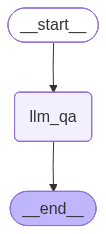

In [16]:
workflow

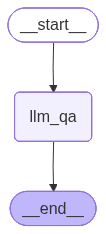

In [18]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod
display(
    Image(
        workflow.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [19]:
initial_state ={'question': 'What is LangGraph?'}
final_state = workflow.invoke(initial_state)
print(final_state)
print(final_state['answer'])

{'question': 'What is LangGraph?', 'answer': '**LangGraph – the graph‑oriented LLM framework**\n\n| What it is | Why it matters | How it’s used |\n|------------|----------------|---------------|\n| **LangGraph** is an open‑source framework (Python) that lets you model a language‑model powered application as a **directed graph**. | It gives you a *first‑class* way to manage conversational state, branching logic, tool calls, and even multi‑agent coordination in a single, declarative structure. | You write a small set of “node” functions (or use pre‑built LangChain chains), wire them together with edges, and run the graph. The framework takes care of state propagation, tool execution, and back‑tracking. |\n\n---\n\n## 1.  Core concepts\n\n| Concept | Description | Typical API |\n|---------|-------------|-------------|\n| **Graph** | The overall workflow – a set of nodes connected by directed edges. | `from langgraph import Graph` |\n| **Node** | A callable that receives the current state 